# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('example.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 1.5

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
# print(json.loads(json.dumps(btc_data)))

# print(json.loads(json.dumps(btc_data))['data']['1']['quotes']['USD']['price'])
btc_price = float(json.loads(json.dumps(btc_data))['data']['1']['quotes']['USD']['price'])

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
# print(json.loads(json.dumps(eth_data)))

# print(json.loads(json.dumps(eth_data))['data']['1027']['quotes']['USD']['price'])
eth_price = float(json.loads(json.dumps(eth_data))['data']['1027']['quotes']['USD']['price'])

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39231.60
The current value of your 1.5 ETH is $2001.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
load_dotenv('example.env')
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
start_date = pd.Timestamp('2021-01-25', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-25', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_price = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Preview DataFrame
df_price.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-25 00:00:00-05:00  117.39  117.56  117.36  117.54  3977366  383.67   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-25 00:00:00-05:00  384.77  378.46  384.4  61090775

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_price['AGG']['close'].values[0]
spy_close_price = df_price['SPY']['close'].values[0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.54
Current SPY closing price: $384.4


In [11]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19220.00
The current value of your 200 AGG shares is $23508.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto_value = my_btc_value + my_eth_value
total_share_value = my_agg_value + my_spy_value

data = {'asset': ['crypto', 'shares'], 'amount' :[total_crypto_value, total_share_value]}
df_savings = pd.DataFrame(data).set_index('asset')

# Display savings DataFrame
display(df_savings)

,amount
asset,
crypto,41233.185
shares,42728.000


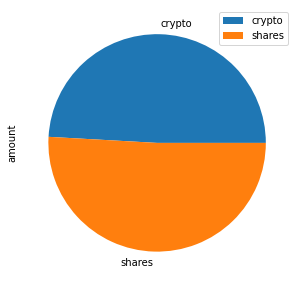

In [17]:
# Plot savings pie chart
# YOUR CODE HERE!
savings_plot = df_savings.plot.pie(y='amount', figsize=(5, 5))

savings_plot.get_figure().savefig("Savings_assets.png", bbox_inches="tight")


In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_share_value

# Validate saving health
if total_savings > emergency_fund: 
    print('Congratulations!!! You have sufficient balance in emergency fund!!')
elif total_savings == emergency_fund: 
    print('Congratulations!!! You have reached your financial goal in emergency fund!')
elif total_savings < emergency_fund:
    print(f'You need aditioanal {emergency_fund - total_savings: .2f} emergency fund to reach financial goal')

Congratulations!!! You have sufficient balance in emergency fund!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-22', tz='America/New_York').isoformat()
tickers

['AGG', 'SPY']

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878.0   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631.0   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148.0   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-01-22 00:00:00-05:00  189.78  190.76  188.88  190.49  132418951  
2016-01-25 00:00:00-05:00  189.93  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  188.42  190.53  188.02  190.18  115312517  
2016-01-27 00:00:00-05:00  189.58  191.56  187.06  188.12  157060622  
2016-01-28 00:00:00-05:00  189.96  190.20  187.16  189.14  118949268

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [25]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878.0   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631.0   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148.0   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-22 00:00:00-05:00          NaN  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   

                                                   
                              volume daily_return  
time                                               
2016-01-22 00:00:00-05:00  132418951          NaN  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000657,0.998740,0.998912,0.994335,0.989023,1.005169,0.987761,0.998837,1.004733,1.003205,...,0.984199,0.993058,1.008619,0.993287,1.001684,1.003283,0.989993,0.990709,1.006530,0.999825
2,1.004265,1.000943,0.987528,1.011333,0.988822,1.003569,0.987341,0.996071,1.005087,1.003825,...,0.990070,0.984209,1.015726,0.984957,1.009429,1.002817,0.996208,0.987161,1.002862,1.002325
3,0.993927,1.006589,0.991841,1.009798,0.994560,0.998523,0.998607,1.002662,0.998354,0.997690,...,0.999702,0.980432,1.015106,0.987342,1.007635,0.997536,0.995856,0.967283,1.010445,1.001407
4,0.992740,1.027983,0.993775,1.014927,0.998991,0.992357,1.005415,1.004461,1.005714,1.001110,...,0.999543,0.984375,1.020465,0.988010,1.028642,0.996538,1.007293,0.962877,1.011089,0.999330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.656767,7.438062,20.924257,22.153669,19.169551,30.046143,10.310232,16.141870,10.893342,8.755742,...,19.284136,127.966086,25.110773,11.835335,14.608323,28.687513,4.169162,8.778328,10.784030,17.570329
7557,11.712999,7.439797,21.012067,22.059128,19.052293,30.143520,10.262732,15.831414,10.878314,8.736925,...,19.086689,126.753433,25.226643,11.712758,14.535471,28.679426,4.138178,8.872172,10.875568,17.662340
7558,11.752356,7.487838,20.883692,21.953888,18.958131,30.127614,10.238031,15.947356,11.053936,8.751267,...,19.389822,125.057351,25.250956,11.785300,14.623959,28.793143,4.119652,8.922871,10.905465,17.422124
7559,11.733356,7.388735,20.818966,21.970447,19.112023,29.935597,10.208394,15.835893,11.122429,8.733176,...,19.412385,123.723547,25.509185,11.619190,14.651516,28.525919,4.114820,8.952905,10.775543,17.299659


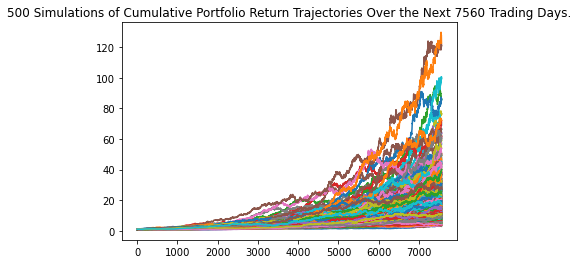

In [33]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

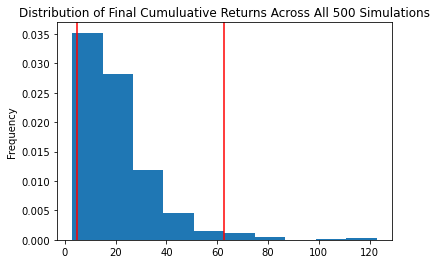

In [128]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

dist_plot.get_figure().savefig("MC_thirtyyear_distribution_plot.png", bbox_inches="tight")

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             21.056750
std              15.376649
min               2.906332
25%              11.033219
50%              17.065363
75%              26.502292
max             122.664730
95% CI Lower      4.974580
95% CI Upper     62.816712
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_30_yr = round(tbl[8]*initial_investment,2)
ci_upper_30_yr = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30_yr} and ${ci_upper_30_yr}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $99491.59 and $1256334.25


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_30_yr = round(tbl[8]*initial_investment,2)
ci_upper_30_yr = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30_yr} and ${ci_upper_30_yr}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $149237.39 and $1884501.37


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [60]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_fiveyear.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878.0   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631.0   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148.0   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-22 00:00:00-05:00          NaN  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   

                                                   
                              volume daily_return  
time                                               
2016-01-22 00:00:00-05:00  132418951          NaN  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422

In [61]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002388,0.995592,1.002218,1.011117,0.998697,1.009334,1.009694,0.991781,1.001450,0.992445,...,0.999621,1.010053,0.989130,0.988408,0.984408,1.002634,1.006725,0.985601,1.010008,1.008334
2,1.008182,0.998239,1.010027,1.013628,0.995362,1.012916,1.013760,0.984996,0.985301,0.983108,...,0.991703,1.008816,0.994468,0.978319,0.986916,0.993648,1.015096,0.975839,1.020376,1.018982
3,1.011182,0.997186,1.013413,1.020105,0.999445,1.012449,1.013071,0.987980,0.993545,0.978478,...,0.993335,1.019228,1.002735,0.973679,0.977801,0.989644,1.015830,0.975379,1.022088,1.005395
4,1.001545,0.990847,1.013925,1.019729,1.000235,1.007037,1.012259,0.976268,0.983058,0.972562,...,0.991282,1.018507,0.997055,0.988891,0.970997,0.997166,1.029320,0.975258,1.021430,1.007281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.166515,2.403154,1.753988,1.554763,2.660212,1.168835,1.209703,1.643896,1.594047,1.390438,...,1.175428,1.549947,2.002523,1.192010,1.875401,1.820556,1.420880,0.794185,1.754439,1.347204
1257,1.175170,2.378858,1.770092,1.576911,2.654823,1.168493,1.206278,1.649082,1.589757,1.382806,...,1.181689,1.540794,1.992793,1.192765,1.861485,1.822713,1.428984,0.792980,1.756382,1.345683
1258,1.193772,2.324870,1.766525,1.599410,2.630499,1.175830,1.205698,1.653213,1.588459,1.389989,...,1.177381,1.543512,2.000062,1.183217,1.827343,1.825852,1.415124,0.800119,1.756229,1.354453
1259,1.186043,2.356123,1.766638,1.591816,2.637586,1.171347,1.197521,1.640653,1.596913,1.397671,...,1.179836,1.530400,2.035943,1.187432,1.822645,1.829454,1.423478,0.802120,1.745940,1.364627


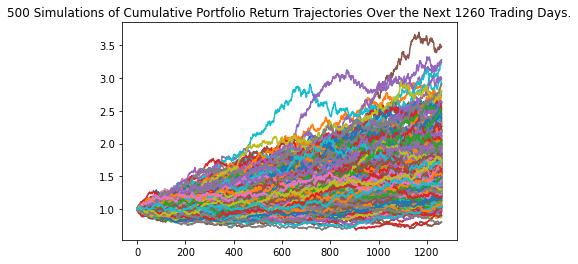

In [130]:
# Plot simulation outcomes
line_plot_2 = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot_2.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

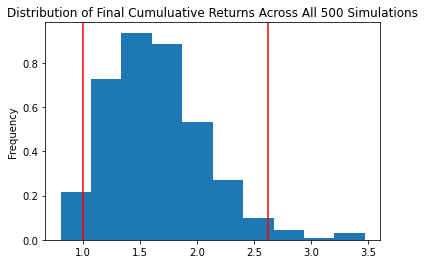

In [129]:
# Plot probability distribution and confidence intervals
dist_plot_2 = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig("MC_fiveyear_distribution_plot.png", bbox_inches="tight")

In [131]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_2)

count           500.000000
mean              1.652879
std               0.426469
min               0.802552
25%               1.330315
50%               1.603738
75%               1.899004
max               3.474428
95% CI Lower      1.001301
95% CI Upper      2.624927
Name: 1260, dtype: float64


In [67]:
# Set initial investment
initial_investment = 20000 * 10 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_2[8]*initial_investment,2)
ci_upper_five = round(tbl_2[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $200000 in the portfolio over the next 5 years will end within in the range of $200260.3 and $524985.48


### Ten Years Retirement Option

In [110]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_fiveyear.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878.0   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631.0   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148.0   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-22 00:00:00-05:00          NaN  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   

                                                   
                              volume daily_return  
time                                               
2016-01-22 00:00:00-05:00  132418951          NaN  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422

In [111]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999227,1.001005,1.002859,0.994828,1.000399,1.004707,1.002870,1.003056,0.999732,1.002762,...,0.992709,1.002031,1.001225,1.000709,0.999321,0.995332,1.002469,1.001211,1.004943,1.001864
2,0.997583,0.998709,1.004595,0.991386,0.998818,1.007521,1.000138,1.001561,1.001719,1.001902,...,0.994637,0.996026,0.998382,1.003053,0.995728,0.999304,1.002090,1.000779,1.006062,1.004751
3,0.995565,0.994673,1.007407,0.994959,0.999807,1.011821,1.000516,0.998993,1.004308,1.006368,...,0.996895,0.995385,0.993803,1.001916,0.990394,0.995809,1.003017,1.001929,1.005117,1.001637
4,0.997537,0.990417,0.999951,0.991095,1.001196,1.014553,0.999636,0.995965,1.004872,1.013129,...,0.997803,0.997158,0.997231,0.998003,0.990547,1.000561,1.001479,1.001735,1.011904,1.000375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.108051,0.990137,1.545057,1.396399,1.925573,1.737246,1.093472,1.434968,1.883194,1.435561,...,2.589338,1.797712,1.163769,1.706552,1.821406,1.493205,1.639421,1.216034,1.778972,1.766233
2517,1.104369,0.987519,1.541880,1.393480,1.922769,1.730999,1.096038,1.430563,1.888263,1.420932,...,2.596907,1.799378,1.168668,1.711832,1.819288,1.498426,1.635591,1.216277,1.774911,1.764452
2518,1.103599,0.990491,1.547288,1.392357,1.928878,1.742677,1.102705,1.436936,1.881983,1.420431,...,2.584963,1.793384,1.163300,1.704170,1.820273,1.496639,1.635463,1.218681,1.778197,1.768170
2519,1.104892,0.986743,1.545522,1.390013,1.927031,1.746863,1.104556,1.446201,1.882847,1.419965,...,2.586383,1.789392,1.160838,1.701667,1.824285,1.488277,1.635467,1.218558,1.774901,1.778579


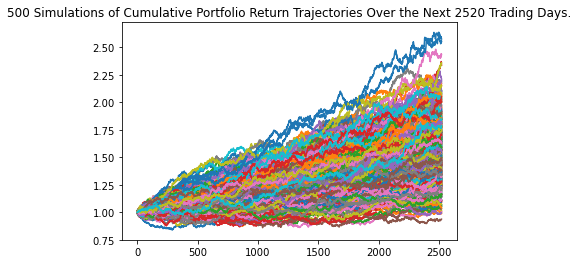

In [132]:
# Plot simulation outcomes
line_plot_3 = MC_tenyear.plot_simulation()

# Save the plot for future usage
line_plot_3.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

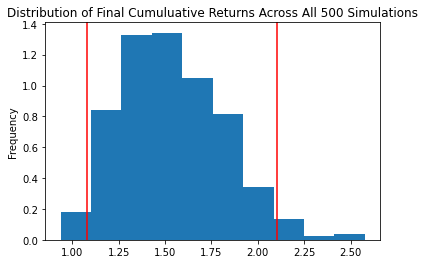

In [133]:
# Plot probability distribution and confidence intervals
dist_plot_3 = MC_tenyear.plot_distribution()

dist_plot_3.get_figure().savefig("MC_tenyear_distribution_plot.png", bbox_inches="tight")

In [114]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_3)

count           500.000000
mean              1.540777
std               0.277815
min               0.937176
25%               1.338890
50%               1.498412
75%               1.727908
max               2.576354
95% CI Lower      1.079926
95% CI Upper      2.103959
Name: 2520, dtype: float64


In [134]:
# Set initial investment
initial_investment = 20000 * 1

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_3[8]*initial_investment,2)
ci_upper_ten = round(tbl_3[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $21598.53 and $42079.17
